<a href="https://colab.research.google.com/github/janmlew/TensorFlow/blob/master/TensorFlow_C1W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My project on DeepLearning.AI TensorFlow Developer Professional Certificate.

Course 1., week 3.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0


# Define the *shallow* model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
print(f'\nSHALLOW MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nSHALLOW MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)


SHALLOW MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5021 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3759 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3365 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3125 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.8910

SHALLOW MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.3633 - accuracy: 0.8712
[0.3633038103580475, 0.8712000250816345]


In [ ]:
# Building the callback function

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>0.95:
      self.model.stop_training = True

callbacks = myCallback()

# Testing basic settings of the convolutional models:

16 convolutions test.

In [ ]:
# Define the *convolutional* model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
# model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nCONVOLUTIONAL MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

# Evaluate on the test set
print(f'\nCONVOLUTIONAL MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)


CONVOLUTIONAL MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5145 - accuracy: 0.8120
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3631 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3164 - accuracy: 0.8836
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2874 - accuracy: 0.8932
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2639 - accuracy: 0.9030

CONVOLUTIONAL MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.3009 - accuracy: 0.8903
[0.3009152412414551, 0.8902999758720398]


32 convolutions test.

In [ ]:
# Define the *convolutional* model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
# model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nCONVOLUTIONAL MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5, verbose=1, callbacks=[callbacks])

# Evaluate on the test set
print(f'\nCONVOLUTIONAL MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)


CONVOLUTIONAL MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4721 - accuracy: 0.8292
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3204 - accuracy: 0.8837
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2767 - accuracy: 0.8989
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2453 - accuracy: 0.9086
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2236 - accuracy: 0.9163

CONVOLUTIONAL MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.2745 - accuracy: 0.9000
[0.2744823098182678, 0.8999999761581421]


32 convolutions + 20 epochs test.

In [ ]:
# Define the *convolutional* model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
# model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nCONVOLUTIONAL MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

# Evaluate on the test set
print(f'\nCONVOLUTIONAL MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)


CONVOLUTIONAL MODEL TRAINING:
Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4605 - accuracy: 0.8322
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3176 - accuracy: 0.8838
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2735 - accuracy: 0.8990
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2453 - accuracy: 0.9098
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2183 - accuracy: 0.9181
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2000 - accuracy: 0.9251
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1823 - accuracy: 0.9320
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1642 - accuracy: 0.9387
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1517 - accuracy: 0.9423
Epoch 10/20
1875/1875 [============================

64 convolutions test.

In [ ]:
# Define the *convolutional* model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
# model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nCONVOLUTIONAL MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

# Evaluate on the test set
print(f'\nCONVOLUTIONAL MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)


CONVOLUTIONAL MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4497 - accuracy: 0.8366
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2965 - accuracy: 0.8903
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2522 - accuracy: 0.9073
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2208 - accuracy: 0.9183
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1957 - accuracy: 0.9265

CONVOLUTIONAL MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2626 - accuracy: 0.9051
[0.2626361548900604, 0.9050999879837036]


Removing the final convolution. What is the impact on accuracy and training time?

In [ ]:
# Define the *convolutional* model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
# model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nCONVOLUTIONAL MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

# Evaluate on the test set
print(f'\nCONVOLUTIONAL MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)


CONVOLUTIONAL MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3821 - accuracy: 0.8651
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2595 - accuracy: 0.9058
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2174 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1841 - accuracy: 0.9313
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1586 - accuracy: 0.9406

CONVOLUTIONAL MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2458 - accuracy: 0.9156
[0.24579870700836182, 0.9156000018119812]


Adding more convolutions.

In [ ]:
# Define the *convolutional* model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
# model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nCONVOLUTIONAL MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

# Evaluate on the test set
print(f'\nCONVOLUTIONAL MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)


CONVOLUTIONAL MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6375 - accuracy: 0.7679
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4424 - accuracy: 0.8365
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3886 - accuracy: 0.8554
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3542 - accuracy: 0.8684
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3308 - accuracy: 0.8781

CONVOLUTIONAL MODEL EVALUATION:
313/313 [==============================] - 1s 4ms/step - loss: 0.3636 - accuracy: 0.8637
[0.36361196637153625, 0.8636999726295471]


128 convolutions test.

In [ ]:
# Define the *convolutional* model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
# model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nCONVOLUTIONAL MODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

# Evaluate on the test set
print(f'\nCONVOLUTIONAL MODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)


CONVOLUTIONAL MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4172 - accuracy: 0.8491
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2775 - accuracy: 0.8978
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2296 - accuracy: 0.9147
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1920 - accuracy: 0.9278
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1633 - accuracy: 0.9396

CONVOLUTIONAL MODEL EVALUATION:
313/313 [==============================] - 1s 3ms/step - loss: 0.2457 - accuracy: 0.9144
[0.2457001954317093, 0.9143999814987183]


In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 31ms/step


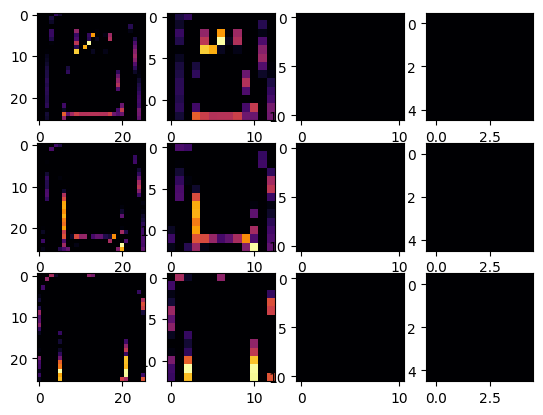

In [ ]:
f, axarr = plt.subplots(3, 4)

FIRST_IMAGE = 1
SECOND_IMAGE = 16
THIRD_IMAGE = 20
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0, 4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0, x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1, x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2, x].grid(False)